In [10]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import random



In [37]:
def benford_x_digit(rawdata,digit):
    data_nonzero=filter(lambda n: n !=0. , rawdata)
    data=list(data_nonzero)
    BFD= [math.log10(1+1/n) for n in range (10**(digit-1),10**digit)]
    data_count={}
    for i in range(10**(digit-1),10**digit):
        data_count[i]=0      
    data_xdigits=[int(str(abs(x*1000))[0:digit]) for x in data]
    for i in range(len(data_xdigits)):
            data_count[data_xdigits[i]]=data_count[data_xdigits[i]]+1
    list_tuples=sorted(data_count.items())
    data_count=[i[1] for i in list_tuples]
    total_count=sum(data_count)
    expected_count=[p * total_count for p in BFD]
    return  data_count, expected_count




In [38]:
def chi_square_test(data_count,digit):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    total_count=sum(data_count)
    BFD= [math.log10(1+1/n) for n in range (10**(digit-1),10**digit)]
    expected_count=[p * total_count for p in BFD] 
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_count):
            chi_square = math.pow(data - expected, 2)
            chi_square_stat += chi_square / expected
    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat < 15.51

In [39]:
def plot_benford(data,digit):   
    data_count, expected_count =benford_x_digit(data,digit)
    chi_square_test(data_count,2)
    y1 = expected_count
    y2 = data_count
    x= np.arange(10**(digit-1),10**digit)
    bins = np.linspace(1, 10)
    width=.35
    plt.bar(x, y1, width, label="Benford")
    plt.bar(x+width, y2, width, label="Actual")
    plt.xticks(x+width/2 , x)
    plt.legend(loc='upper right')
    plt.show()


Chi-squared Test Statistic = 157.534
Critical value at a P-value of 0.05 is 15.51.


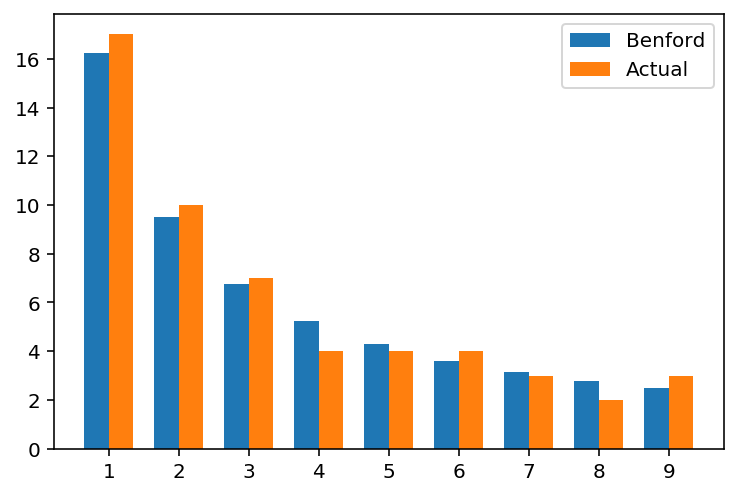

In [46]:

data=[1,10,2,4,334,667,878,989,7,12,22,100,132,144,167,1000,190,58,299,4,30,500,0,72,-1,0.02,999999,100,111,34,111,12,3,5,7,6,8,9,6,23,3,6,214,38,1,223,2,11,223,4,1,2,33,4,55,]
plot_benford(data,1)
